In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
#A simple two-module problem
import numpy as np

class GeneticAlgorithm:
    def __init__(self, population_size, gene_length, mutation_rate, num_generations):
        self.population_size = population_size
        self.gene_length = gene_length
        self.mutation_rate = mutation_rate
        self.num_generations = num_generations

    def initialize_population(self):
        return np.random.randint(0, 2, size=(self.population_size, self.gene_length))

    def generate_R_values(self):#初始化一次
        R_values = np.random.uniform(0.5, 1.0,(self.gene_length,self.gene_length))#初始化R（i，j）
        return R_values


    def fitness_function(self,R_values,genotype):#计算fintness
        n = len(genotype) // 2
        left_gene = genotype[:n]
        right_gene = genotype[n:]

        i=sum(left_gene)
        j=sum(right_gene)

        fitness=R_values[i-1,j-1] *  (np.float64(2) ** i + np.float64(2) ** j)
        if fitness < 0:
            print(i,j,R_values[i-1,j-1])
            print(fitness)
        return fitness
    
    def calculate_fitness(self, R_values,population):
        # 计算种群中每个个体的适应度
        fitness_scores = np.zeros(self.population_size)
        for i in range(self.population_size):
            fitness_scores[i] = self.fitness_function(R_values,population[i])
        return fitness_scores

#     def fitness_function(self, genotype):
#         n = len(genotype) // 2
#         left_gene = genotype[:n]
#         right_gene = genotype[n:]

#         i = np.sum(left_gene)
#         j = np.sum(right_gene)

#         return np.random.uniform(0.5, 1.0) * (2 ** i + 2 ** j)

    def selection(self, population, fitness_scores):
        # 使用适应度比例选择
        probabilities = fitness_scores / np.sum(fitness_scores)
#         print(fitness_scores)
#         print(probabilities)
        selected_indices = np.random.choice(np.arange(self.population_size), size=self.population_size, p=fitness_scores / np.sum(fitness_scores))
        return population[selected_indices]

    def crossover(self, parent1, parent2):
        # 使用一点交叉
        crossover_point = np.random.randint(1, self.gene_length)
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2

    def mutation(self, genotype):
#         # 对新生成的个体进行突变
#         mutation_indices = np.random.rand(self.gene_length) < self.mutation_rate
#         mutated_genotype = np.copy(genotype)
#         mutated_genotype[mutation_indices] = 1 - mutated_genotype[mutation_indices]  # 突变为另一种可能的值
#         return mutated_genotype
        # 对个体进行突变
        mutated_genotype = np.copy(genotype)
        for i in range(self.gene_length):
            if np.random.rand() < self.mutation_rate:
                mutated_genotype[i] = 1 - mutated_genotype[i]  # 突变为另一种可能的值
        return mutated_genotype

    def run(self):
        # 初始化种群
        population = self.initialize_population()

        R_values=self.generate_R_values()
        max_fitness_generation = 0
        max_fitness = 0
        count=0 #record the generation in bigest fitness
        
        for generation in range(self.num_generations):
            # 计算适应度
            fitness_scores = self.calculate_fitness(R_values,population)

            max_fitness_in_generation = np.max(fitness_scores)
            # 检查是否已达到最优解
            if max_fitness_in_generation == 1:
                return generation + 1
            if max_fitness_in_generation > max_fitness:
                max_fitness = max_fitness_in_generation
                count=generation+1

                
            # 选择
            selected_population = self.selection(population, fitness_scores)

            # 保留最适应个体
            elite_index = np.argmax(fitness_scores)
            selected_population[0] = population[elite_index]

            # 交叉
            new_population = []
            for i in range(0, self.population_size - 1, 2):
                child1, child2 = self.crossover(selected_population[i], selected_population[i + 1])
                new_population.extend([child1, child2])

            # 突变
            for i in range(self.population_size):
                new_population[i] = self.mutation(new_population[i])

            # 更新种群
            population = np.array(new_population)

        return count
    
    def run_withoutCross(self):
        # 初始化种群
        population = self.initialize_population()
        R_values=self.generate_R_values()
        max_fitness_generation = 0
        max_fitness = 0
        count=0 #record the generation in bigest fitness
        
        for generation in range(self.num_generations):
            # 计算适应度
            fitness_scores = self.calculate_fitness(R_values,population)

            max_fitness_in_generation = np.max(fitness_scores)
            # 检查是否已达到最优解
            if max_fitness_in_generation == 1:
                return generation + 1
            if max_fitness_in_generation > max_fitness:
                max_fitness = max_fitness_in_generation
                count=generation+1

                
            # 选择
            selected_population = self.selection(population, fitness_scores)

            # 保留最适应个体
            elite_index = np.argmax(fitness_scores)
            selected_population[0] = population[elite_index]

            # 突变
            for i in range(self.population_size):
                selected_population[i] = self.mutation(selected_population[i])
            
            # 更新种群
            population = np.array(selected_population)

        return count

[(2.7, 1.5088627063675035), (7.233333333333333, 3.0406505151949896), (51.13333333333333, 84.87706142153813), (94.4, 175.57004300278567), (137.93333333333334, 228.9389923587116), (108.46666666666667, 174.19198858985706), (88.93333333333334, 141.83721498801208), (113.03333333333333, 186.499416144454)]
[(3.466666666666667, 2.472964932132187), (22.4, 16.867325415330864), (170.53333333333333, 251.82291838159253), (239.93333333333334, 278.26042158780365), (280.03333333333336, 311.83291288052897), (61.36666666666667, 100.83203304946741), (131.46666666666667, 227.7515800652593), (129.83333333333334, 245.4383946238965)]


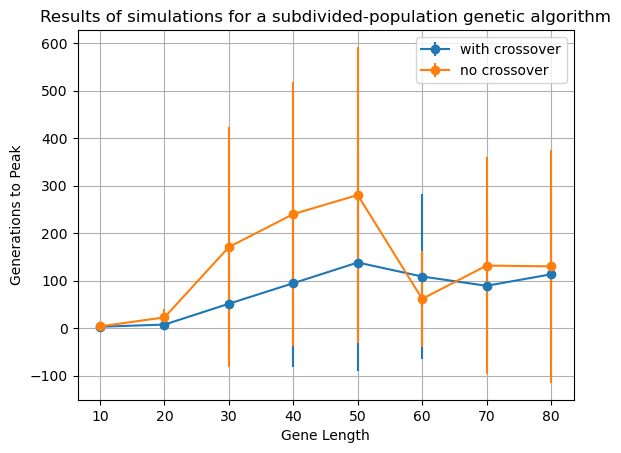

In [33]:
# 设置实验参数
population_size = 100

num_runs = 30
gene_lengths = np.arange(10, 90, 10)
num_generations_to_peak = []

num_generations_to_peak_without=[]

# 运行多次实验
for gene_length in gene_lengths:
    num_generations = []
    num_generations_without=[]
    
    n=gene_length//2
    mutation_rate = 1 / (2*n)
    for _ in range(num_runs):
        ga = GeneticAlgorithm(population_size, gene_length, mutation_rate, num_generations=1000)
        generations = ga.run()
        generations_without=ga.run_withoutCross()
        
        num_generations.append(generations)
        num_generations_without.append(generations_without)
        
    num_generations_to_peak.append((np.mean(num_generations), np.std(num_generations)))
    num_generations_to_peak_without.append((np.mean(num_generations_without), np.std(num_generations_without)))

print(num_generations_to_peak)
print(num_generations_to_peak_without)

# 绘制图像
means, stds = zip(*num_generations_to_peak)
means_without, stds_without=zip(*num_generations_to_peak_without)

plt.errorbar(gene_lengths, means, yerr=stds, label='with crossover', fmt='-o')
plt.errorbar(gene_lengths, means_without, yerr=stds_without,label='no crossover', fmt='-o')
# 添加图例
plt.legend()

plt.xlabel('Gene Length')
plt.ylabel('Generations to Peak')
plt.title('Results of simulations for a subdivided-population genetic algorithm')
plt.grid(True)
plt.show()

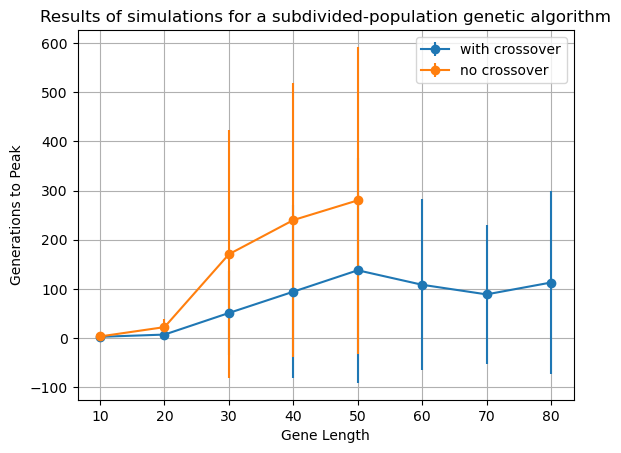

In [34]:
plt.errorbar(gene_lengths, means, yerr=stds, label='with crossover', fmt='-o')
plt.errorbar(gene_lengths[:5], means_without[:5], yerr=stds_without[:5],label='no crossover', fmt='-o')
# 添加图例
plt.legend()

plt.xlabel('Gene Length')
plt.ylabel('Generations to Peak')
plt.title('Results of simulations for a subdivided-population genetic algorithm')
plt.grid(True)
plt.show()

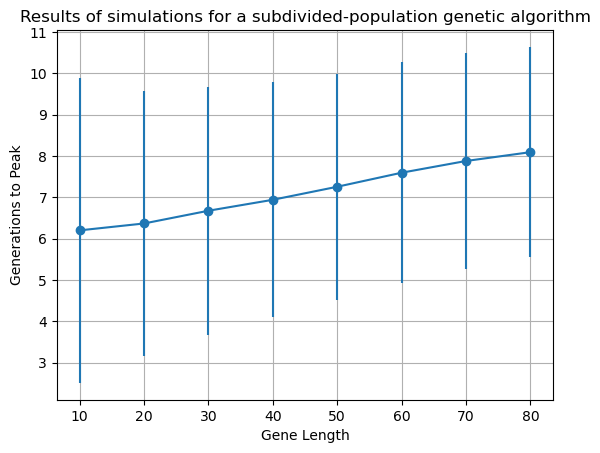

In [31]:
#测试here
# 设置实验参数
population_size = 100

num_runs = 30
gene_lengths = np.arange(10, 90, 10)
num_generations_to_peak = []

# 运行多次实验
for gene_length in gene_lengths:
    num_generations_without=[]
    
    n=gene_length//2
    mutation_rate = 1 / (2*n)
    for _ in range(num_runs):
        ga = GeneticAlgorithm(population_size, gene_length, mutation_rate, num_generations=10)
        generations = ga.run()
        num_generations.append(generations)
    num_generations_to_peak.append((np.mean(num_generations), np.std(num_generations)))

# 绘制图像
means, stds = zip(*num_generations_to_peak)
plt.errorbar(gene_lengths, means, yerr=stds, fmt='-o')
plt.xlabel('Gene Length')
plt.ylabel('Generations to Peak')
plt.title('Results of simulations for a subdivided-population genetic algorithm')
plt.grid(True)
#plt.show()

[(1.6333333333333333, 1.110055053689781), (6.233333333333333, 1.9610088106776968), (6.966666666666667, 1.5595583420386112), (8.166666666666666, 1.9163043135739746), (8.933333333333334, 0.813770374382247)]


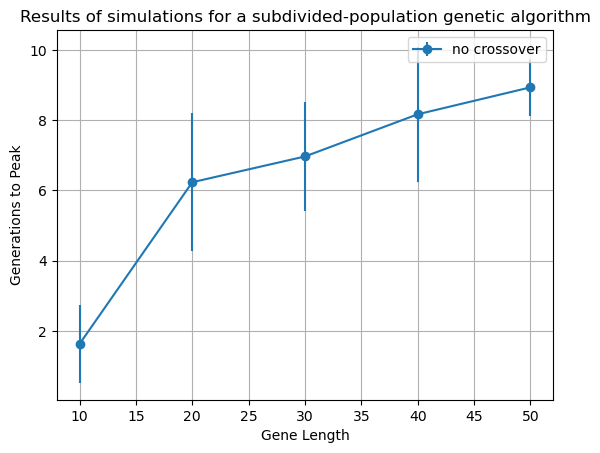

In [27]:
# 设置实验参数
population_size = 400

num_runs = 30
gene_lengths = np.arange(10, 60, 10)
num_generations_to_peak = []

num_generations_to_peak_without=[]

# 运行多次实验
for gene_length in gene_lengths:

    num_generations_without=[]
    
    n=gene_length//2
    mutation_rate = 1 / (2*n)
    for _ in range(num_runs):
        ga = GeneticAlgorithm(population_size, gene_length, mutation_rate, num_generations=10)
        generations_without=ga.run_withoutCross()
        
        num_generations_without.append(generations_without)
        
    num_generations_to_peak_without.append((np.mean(num_generations_without), np.std(num_generations_without)))

print(num_generations_to_peak_without)

# 绘制图像
means_without, stds_without=zip(*num_generations_to_peak_without)

plt.errorbar(gene_lengths, means_without, yerr=stds_without,label='no crossover', fmt='-o')
# 添加图例
plt.legend()

plt.xlabel('Gene Length')
plt.ylabel('Generations to Peak')
plt.title('Results of simulations for a subdivided-population genetic algorithm')
plt.grid(True)
plt.show()